# Simple moving average - media mobile semplice

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
#plt.style.use("seaborn")
import yfinance as yf

C:\Users\Paolo\AppData\Local\Temp\ipykernel_16244\3282586626.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
sp500 = yf.download("^GSPC", start="2014-10-01", end="2024-10-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
sp500.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-10-01  1971.439941  1971.439941  1941.719971  1946.160034  1946.160034   
2014-10-02  1945.829956  1952.319946  1926.030029  1946.170044  1946.170044   
2014-10-03  1948.119995  1971.189941  1948.119995  1967.900024  1967.900024   
2014-10-06  1970.010010  1977.839966  1958.430054  1964.819946  1964.819946   
2014-10-07  1962.359985  1962.359985  1934.869995  1935.099976  1935.099976   

                Volume  
Date                    
2014-10-01  4188590000  
2014-10-02  4012510000  
2014-10-03  3560970000  
2014-10-06  3358220000  
2014-10-07  3687870000

In [4]:
sp500 = sp500["Adj Close"].to_frame()

In [5]:
sp500.head()

Adj Close
Date                   
2014-10-01  1946.160034
2014-10-02  1946.170044
2014-10-03  1967.900024
2014-10-06  1964.819946
2014-10-07  1935.099976

$$\text{SMA}_{\text{oggi}} = \frac{\text{PREZZO}_\text{ieri}}{N} + ... + \frac{\text{PREZZO}_\text{N giorni prima}}{N} $$


In [6]:
list(sp500.rolling(window=10))

[              Adj Close
 Date                   
 2014-10-01  1946.160034,
               Adj Close
 Date                   
 2014-10-01  1946.160034
 2014-10-02  1946.170044,
               Adj Close
 Date                   
 2014-10-01  1946.160034
 2014-10-02  1946.170044
 2014-10-03  1967.900024,
               Adj Close
 Date                   
 2014-10-01  1946.160034
 2014-10-02  1946.170044
 2014-10-03  1967.900024
 2014-10-06  1964.819946,
               Adj Close
 Date                   
 2014-10-01  1946.160034
 2014-10-02  1946.170044
 2014-10-03  1967.900024
 2014-10-06  1964.819946
 2014-10-07  1935.099976,
               Adj Close
 Date                   
 2014-10-01  1946.160034
 2014-10-02  1946.170044
 2014-10-03  1967.900024
 2014-10-06  1964.819946
 2014-10-07  1935.099976
 2014-10-08  1968.890015,
               Adj Close
 Date                   
 2014-10-01  1946.160034
 2014-10-02  1946.170044
 2014-10-03  1967.900024
 2014-10-06  1964.819946
 2014-10-07  1935.0

In [7]:
sp500.rolling(window=10).mean() # also median, min, max, sum are possible

Adj Close
Date                   
2014-10-01          NaN
2014-10-02          NaN
2014-10-03          NaN
2014-10-06          NaN
2014-10-07          NaN
...                 ...
2024-09-19  5575.046924
2024-09-20  5604.459912
2024-09-23  5629.211914
2024-09-24  5652.952930
2024-09-25  5670.946924

[2513 rows x 1 columns]

In [8]:
sp500.rolling(window=10, min_periods=4).mean() # also median, min, max, sum are possible

Adj Close
Date                   
2014-10-01          NaN
2014-10-02          NaN
2014-10-03          NaN
2014-10-06  1956.262512
2014-10-07  1952.030005
...                 ...
2024-09-19  5575.046924
2024-09-20  5604.459912
2024-09-23  5629.211914
2024-09-24  5652.952930
2024-09-25  5670.946924

[2513 rows x 1 columns]

In [9]:
sp500["MovAv50"]=sp500["Adj Close"].rolling(window=50, min_periods=20).mean()
sp500["MovAv200"]=sp500["Adj Close"].rolling(window=200, min_periods=100).mean()

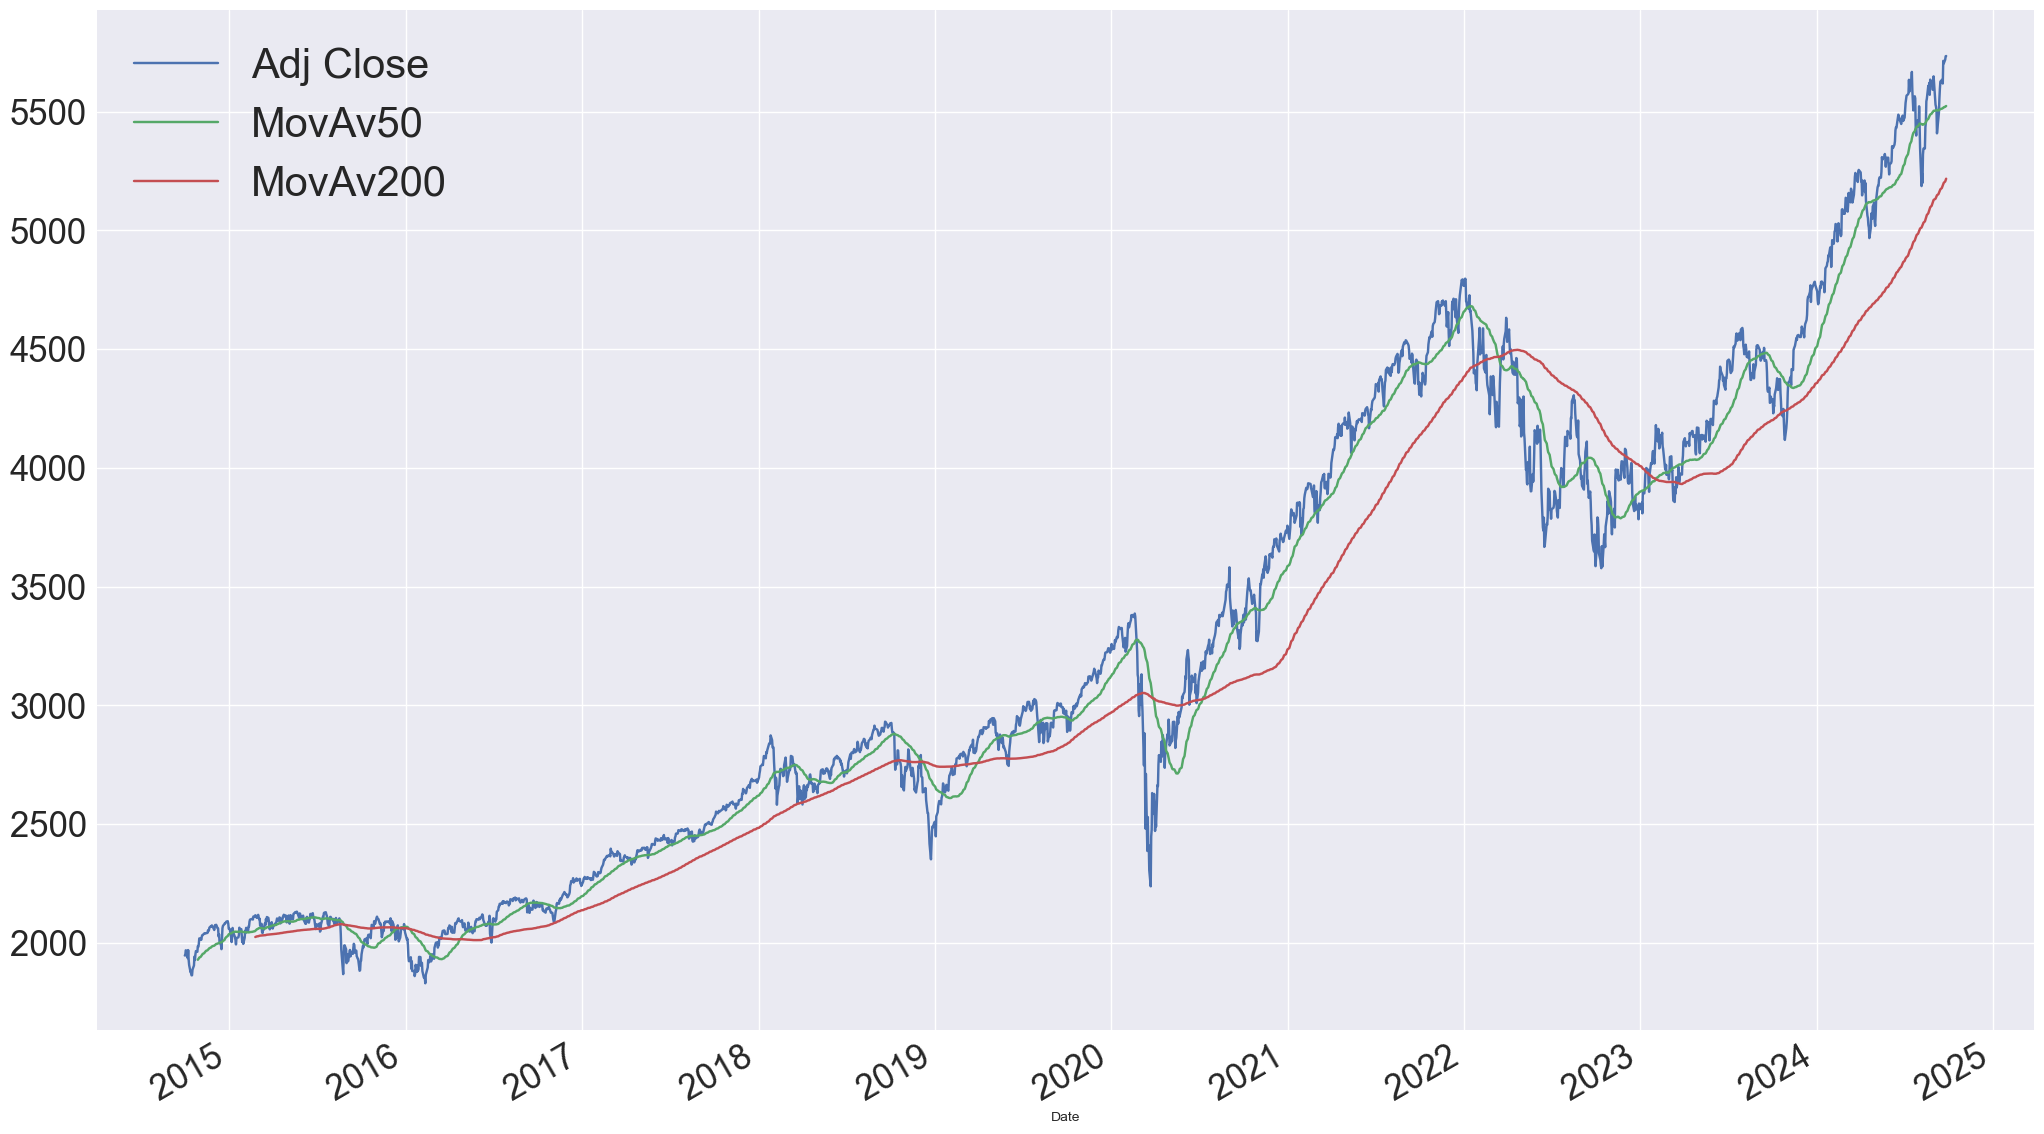

In [10]:
sp500.plot(figsize=(25,15), fontsize=25)
plt.legend(fontsize=30)
plt.show()

# Exponential moving average - media mobile esponenziale

$$\text{SMA}_{\text{oggi}} = \frac{\text{PREZZO}_\text{ieri}}{N} + ... + \frac{\text{PREZZO}_\text{N giorni prima}}{N} $$
$$\text{EMA}_{\text{oggi}} = \text{PREZZO}_{\text{ieri}} \cdot \frac{2}{\text{span}+1} + \text{EMA}_{\text{ieri}} \cdot \frac{\text{span}-1}{\text{span}+1}$$

In [11]:
sp500 = yf.download("^GSPC", start="2014-10-01", end="2024-10-01")["Adj Close"].to_frame()

[*********************100%***********************]  1 of 1 completed


In [12]:
sp500.ewm(span=10,min_periods=5).mean()

Adj Close
Date                   
2014-10-01          NaN
2014-10-02          NaN
2014-10-03          NaN
2014-10-06          NaN
2014-10-07  1951.547197
...                 ...
2024-09-19  5609.265921
2024-09-20  5626.226627
2024-09-23  5643.016300
2024-09-24  5659.364277
2024-09-25  5672.994423

[2513 rows x 1 columns]

In [13]:
sp500["SMA100"]=sp500["Adj Close"].rolling(window=100, min_periods=50).mean()
sp500["EMA100"]=sp500["Adj Close"].ewm(span=100,min_periods=50).mean()

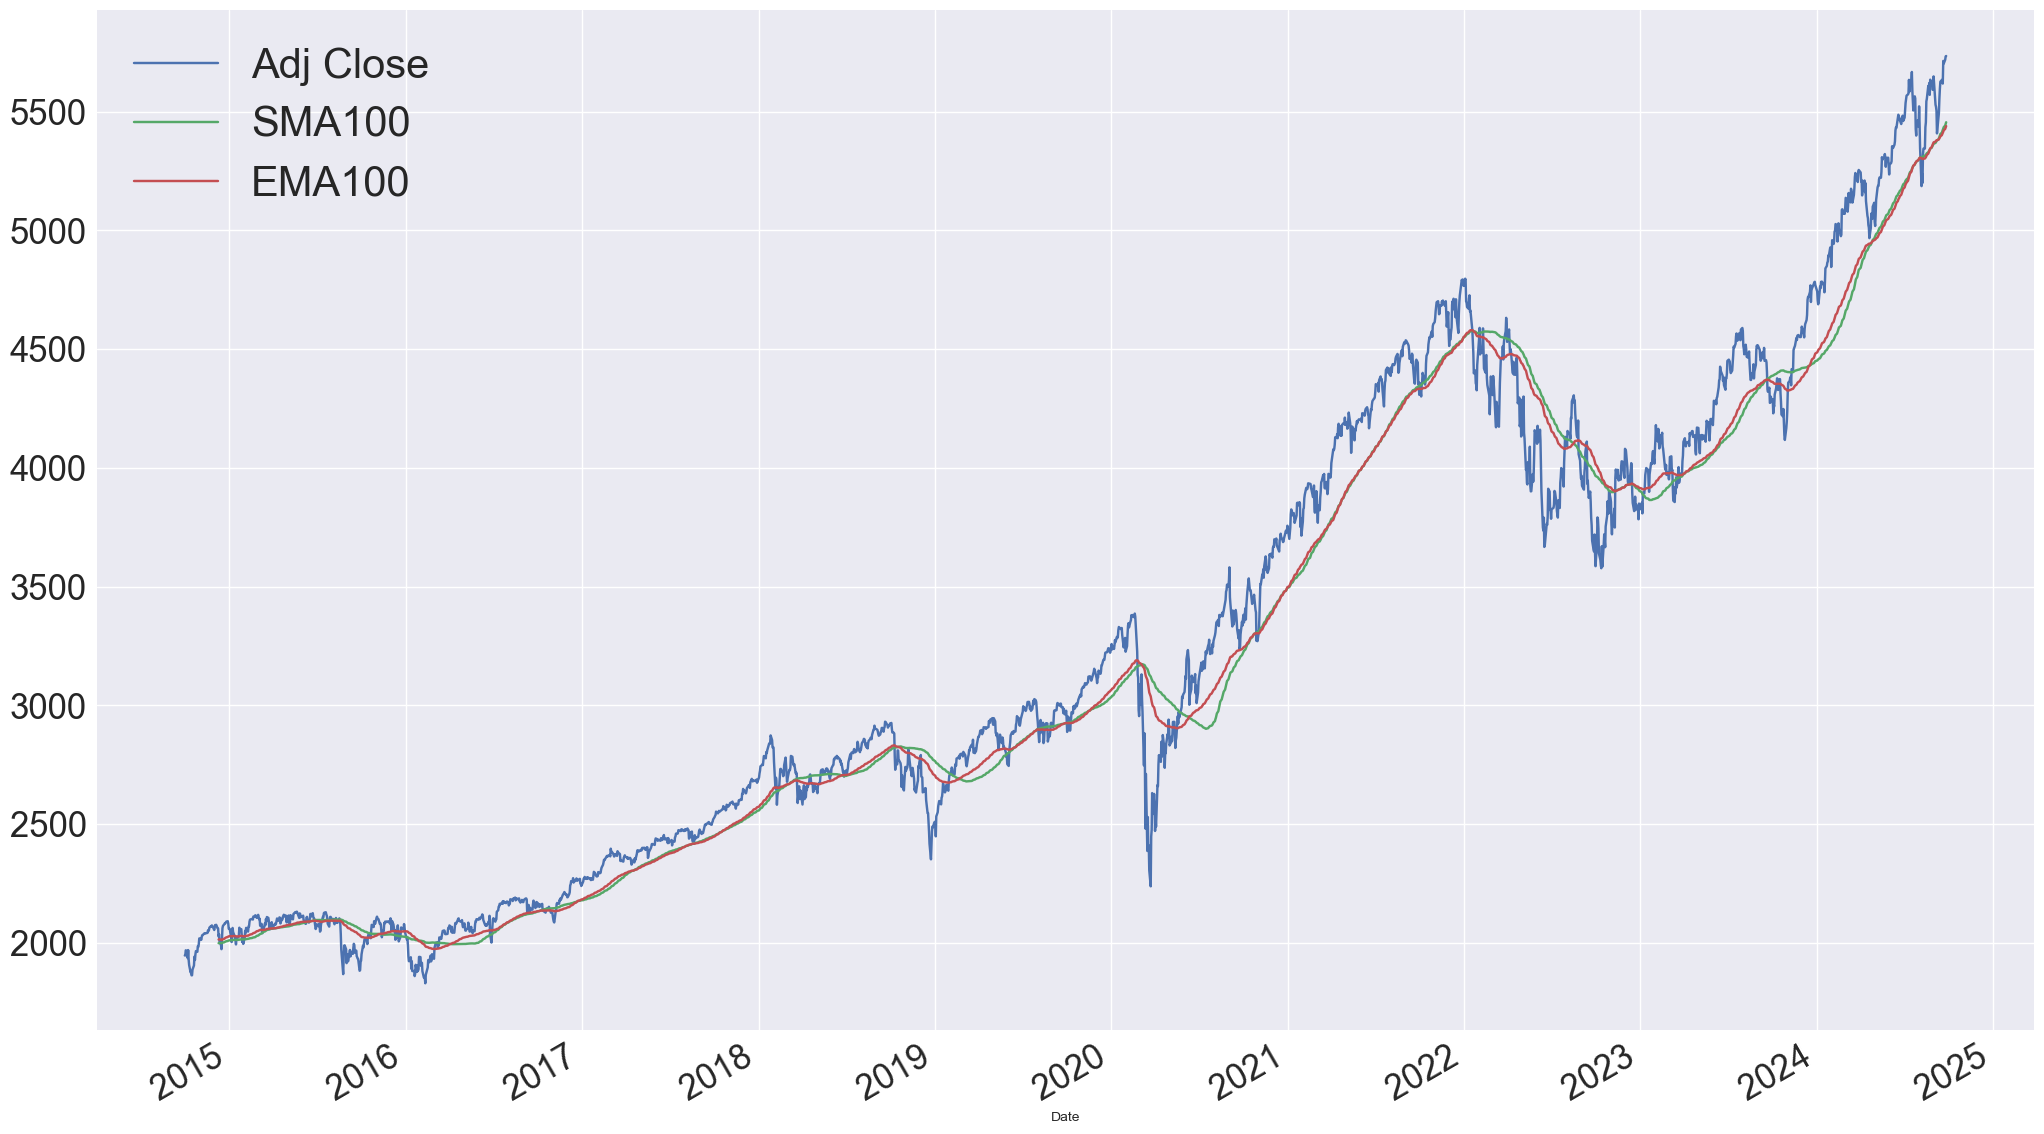

In [14]:
sp500.plot(figsize=(25,15), fontsize=25)
plt.legend(fontsize=30)
plt.show()